# CONTENT

[0](#0) Генерация синтетических данных <br>
[1](#1) Чтение и визуальное ознакомление <br>
[2](#2) Обогащение данных <br>
[3](#3) Cмотрим общую информацию <br>
[4](#4) Считаем отсутствующие значения (None, NaN) и обрабатываем (если применимо) <br>
[5](#5) Приведение данных <br>
[6](#6) Знакомимся с категориальными данными <br>
[7](#7) Смотрим распредление по числовым данным <br>
[8](#8) Строим графики, группируем данные логически <br>
[9](#9) Делаем вывод <br>

In [1]:
import pandas as pd

import numpy as np

import warnings

import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# 0 

# Для удобства сгенерим файл с синтетическми данными

[CONTENT](#CONTENT)<br>

In [2]:
n = 345

random_days = np.random.randint(1, 32, n)
dates = pd.to_datetime(
    [f"2025-01-{day:02d}" for day in random_days]
)

# Генерация данных
data = {
    "Price": np.round(np.random.uniform(10, 500, n), 2),
    "CustomerID": np.random.randint(1, 120, n),
    "datePurcase": dates,
    "Product": np.random.choice(
        ["Laptop", "Phone", "Tablet", "Headphones", "Monitor"], n
    )  # случайные товары
}


df = pd.DataFrame(data)
df = df.sort_values(by='datePurcase')


random_hours = np.random.randint(0, 24, len(df))
random_minutes = np.random.randint(0, 60, len(df))
df['datePurcase'] = df['datePurcase'] + pd.to_timedelta(random_hours, unit='h') + pd.to_timedelta(random_minutes, unit='m')

# 5 случайных nan в Sum
nan_idx = np.random.choice(df.index, 5, replace=False)
df.loc[nan_idx, "Price"] = np.nan

# 7 случайных None в Product
none_idx = np.random.choice(df.index, 7, replace=False)
df.loc[none_idx, "Product"] = None

qty_raw = np.random.lognormal(mean=1, sigma=0.5, size=len(df))
# значения от 1 до 6
qty = np.clip(np.round(qty_raw).astype(int), 1, 6)
df["qty"] = qty



df.to_csv('sample_eda_data.csv', sep='$', index=False)

# 1

# Считываем файл и знакомимся с ним визуально

[CONTENT](#CONTENT)<br>

In [3]:
df = pd.read_csv('sample_eda_data.csv', sep='$')
df.head()

,Price,CustomerID,datePurcase,Product,qty
0,315.93,90,2025-01-01 19:53:00,Tablet,2
1,361.05,82,2025-01-01 19:22:00,Phone,3
2,410.59,84,2025-01-01 22:49:00,Tablet,2
3,131.28,8,2025-01-01 06:40:00,Tablet,2
4,27.39,44,2025-01-01 02:46:00,Tablet,5


# 2

# Обогащаем данные

## Понимаем, что для понимания сути транзакции будет полезна общая стоимость по заказу
Создадим необходимый столбец

[CONTENT](#CONTENT)<br>

In [4]:
df['sum'] = df['Price'] * df['qty']

df.head(2)

,Price,CustomerID,datePurcase,Product,qty,sum
0,315.93,90,2025-01-01 19:53:00,Tablet,2,631.86
1,361.05,82,2025-01-01 19:22:00,Phone,3,1083.15


In [5]:
## Сразу переименовыем столбцы по стандарту

In [6]:
df.columns = ['price', 'customer_id', 'date_purchase', 'product', 'qty', 'sum']
df.columns

Index(['price', 'customer_id', 'date_purchase', 'product', 'qty', 'sum'], dtype='object')

# 3

# Cмотрим общую информацию о датафрейме

[CONTENT](#CONTENT)<br>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          340 non-null    float64
 1   customer_id    345 non-null    int64  
 2   date_purchase  345 non-null    object 
 3   product        338 non-null    object 
 4   qty            345 non-null    int64  
 5   sum            340 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 16.3+ KB


### Видим пропуски в столбке price, product (5, 7 соответсвенно) и производное значение столбца sum также отсутствует там где нет price

# 4

# Считаем отсутствующие значения (None, NaN), принимаем решение как с ними работаем дальше

[CONTENT](#CONTENT)<br>

In [8]:
display(df['product'].isna().sum())
display(df['sum'].isna().sum())
df.isna().sum()

7

5

price            5
customer_id      0
date_purchase    0
product          7
qty              0
sum              5
dtype: int64

## Заменяем пропущенные значения, где имеет смысл и не искажает данные

In [11]:
# df = df.fillna('-1')  - заменит во всем df
df['product'].fillna('Unknown', inplace=True)

# 5

# Приведение данных

[CONTENT](#CONTENT)<br>

## Если видим не соответствие значений типу данных осуществляем приведение

In [9]:
df['qty'] = pd.to_numeric(df['qty'])

df['date_purchase'] = pd.to_datetime(df['date_purchase'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          340 non-null    float64       
 1   customer_id    345 non-null    int64         
 2   date_purchase  345 non-null    datetime64[ns]
 3   product        338 non-null    object        
 4   qty            345 non-null    int64         
 5   sum            340 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 16.3+ KB


In [10]:
display(df['date_purchase'].max(), df['date_purchase'].min())

Timestamp('2025-01-31 23:41:00')

Timestamp('2025-01-01 02:46:00')

### привели дату к верному типу, определили начальную и конечную дату в данных (период времени)

# 6

# Знакомимся с категориальными данными

[CONTENT](#CONTENT)<br>

## Смотрим уникальные значения по столбцу product 

In [12]:
df['product'].unique()

array(['Tablet', 'Phone', 'Laptop', 'Headphones', 'Monitor', 'Unknown'],
      dtype=object)

# 7

# Смотрим распредление по числовым данным

[CONTENT](#CONTENT)<br>

In [13]:
df[['price', 'qty']].describe()

,price,qty
count,340.000000,345.000000
mean,258.933176,2.811594
std,143.675604,1.341157
min,10.130000,1.000000
25%,127.232500,2.000000
50%,264.070000,3.000000
75%,386.970000,4.000000
max,499.690000,6.000000


# 8

# Строим графики, группируем данные логически

[CONTENT](#CONTENT)<br>

## Смотрим сумму по группировке

### общая сумма с разбивкой по продукту с визуализацией


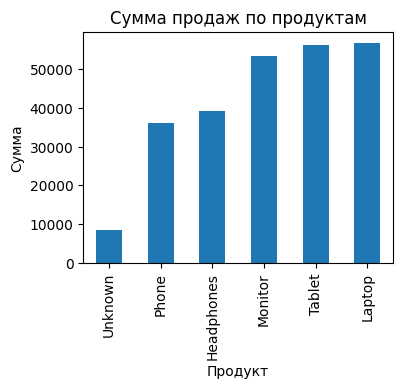

In [14]:
grouped = df.groupby('product')['sum'].sum().sort_values()

plt.figure(figsize=(4, 3))
grouped.plot(kind='bar')


plt.title('Сумма продаж по продуктам')
plt.ylabel('Сумма')
plt.xlabel('Продукт')
plt.show()

### общая сумма с разбивкой по клиенту с визуализацией

Text(0.5, 0, 'Сумма')

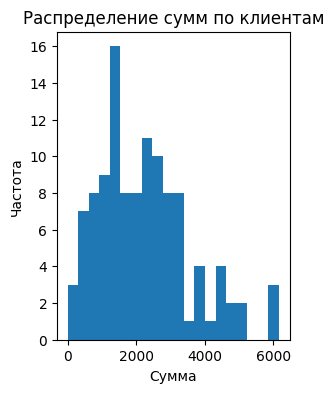

In [15]:

grouped = df.groupby('customer_id')['sum'].sum()

plt.figure(figsize=(3,4))
grouped.plot(kind='hist', bins = 20)

plt.title('Распределение сумм по клиентам')
plt.ylabel('Частота')
plt.xlabel('Сумма')


### Смотрим количество покупок по той же группироке

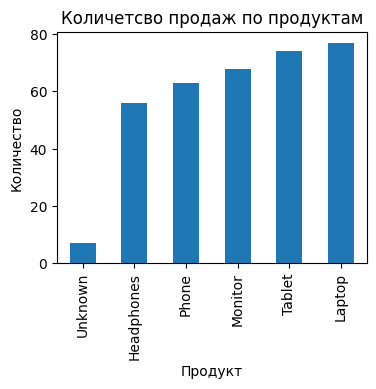

In [16]:
grouped = df.groupby('product')['qty'].count().sort_values()

plt.figure(figsize=(4, 3))
grouped.plot(kind='bar')


plt.title('Количетсво продаж по продуктам')
plt.ylabel('Количество')
plt.xlabel('Продукт')
plt.show()

Text(0.5, 0, 'Количество')

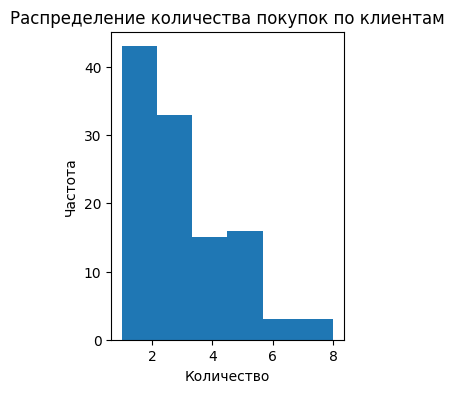

In [17]:
grouped = df.groupby('customer_id')['qty'].count()

plt.figure(figsize=(3,4))
grouped.plot(kind='hist', bins = 6)

plt.title('Распределение количества покупок по клиентам')
plt.ylabel('Частота')
plt.xlabel('Количество')

## Построим график количества покупок по часам и дням недели

In [26]:
sales_hourly = df.groupby(df['date_purchase'].dt.hour)['qty'].sum()

sales_weekdaily = df.groupby(df['date_purchase'].dt.day_name())['qty'].sum()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_weekdaily = sales_weekdaily.reindex(days_order)

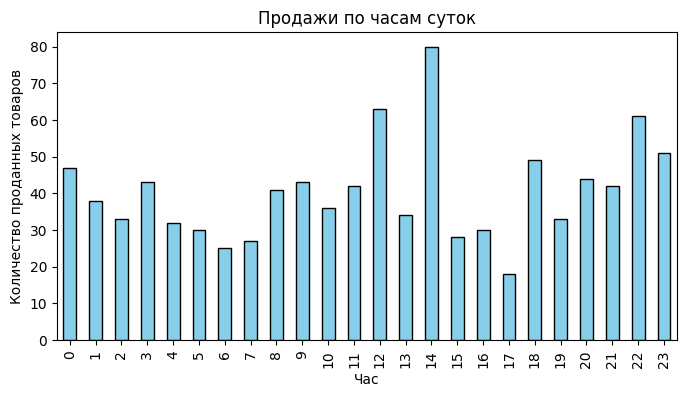

In [29]:
plt.figure(figsize=(8,4))
sales_hourly.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Продажи по часам суток')
plt.xlabel('Час')
plt.ylabel('Количество проданных товаров')
plt.xticks(range(0, 24))
plt.show()

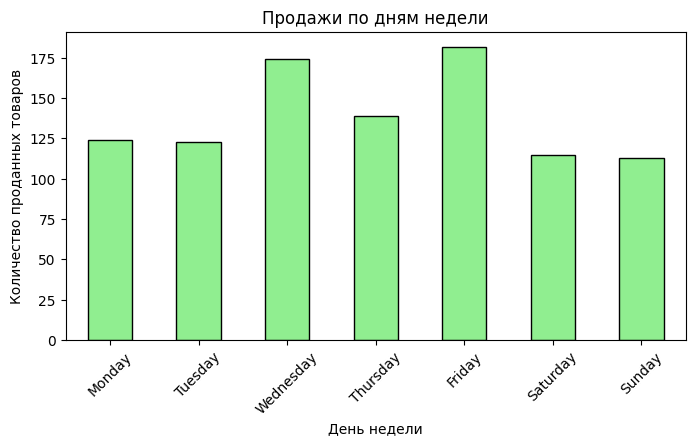

In [30]:
plt.figure(figsize=(8,4))
sales_weekdaily.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Продажи по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество проданных товаров')
plt.xticks(rotation=45)
plt.show()

# 9

# Вывод